# Figure 8: Surface plots (diffusion parameters)

In [1]:
import numpy as np
import pandas as pd
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

Data preparation

In [10]:
path = '/Users/aibekk99/Desktop/repository/data/d3.csv'     # csv file generated with fig8.py script
data = pd.read_csv(path)
dx = [-3,-2.7,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,2.7,3]          # diffusion parameters 
dy = [-3,-2.7,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,2.7,3]
percentage = np.array(data['Percentage'])
l = len(dx)
per = [percentage[i:i+l] for i in range(0, len(percentage), l)]

Plotting data

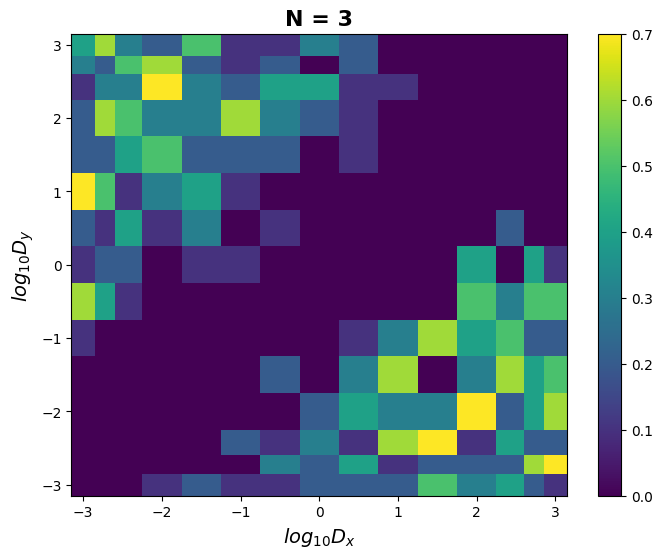

In [11]:
Y, X = np.meshgrid(dy, dx)
plt.figure(figsize=(8, 6))
colormap = plt.pcolormesh(X, Y, per, cmap='viridis')
plt.colorbar(colormap)
plt.xlabel(r'n', fontsize = 14)
plt.xlabel(r'$log_{10}$$D_{x}$', fontsize = 14)
plt.ylabel(r'$log_{10}$$D_{y}$', fontsize = 14)
plt.title('N = 3', fontsize = 16,  fontweight = 'bold')
plt.show()